## a)

1. 
$x_1$: Số lượng raido kiểu 1

$x_2$: Số lượng radio kiểu 2

Hàm mục tiêu: 

$Lợi nhuận = 250000x_1 + 180000x_2$

Tối tiểu hóa: 

$f_0(x) = -(250000x_1+180000x_2)$

Ràng buộc: 

linh kiện: 
$12x_1 + 9x_2  \leq 900$

$x_1 \leq 45$

$x_2 \leq 80$

số lượng phải không âm: 

$x_1 \geq 0$,  $x_2 \geq 0$

Ma trận A và vector b là: 

$$
A = \begin{bmatrix}
12 & 9 \\
1 & 0 \\
0 & 1
\end{bmatrix}$$,

$$b= \begin{bmatrix}
900\\
45\\
80
\end{bmatrix}$$

## b)

In [1]:
# Import thư viện
from scipy.optimize import linprog

# Hàm mục tiêu (lưu ý: phải là dạng tối thiểu hóa, nên chúng ta nhân hệ số với -1)
c = [-250000, -180000]  # hệ số của hàm lợi nhuận

# Ma trận A biểu diễn các hệ số của các ràng buộc
A = [
    [12, 9],  # Ràng buộc số linh kiện
    [1, 0],   # Ràng buộc số lượng radio kiểu 1
    [0, 1]    # Ràng buộc số lượng radio kiểu 2
]

# Vector b biểu diễn các giới hạn của các ràng buộc
b = [900, 45, 80]

# Ràng buộc không âm (x1, x2 >= 0)
x_bounds = (0, None)  # Không âm cho cả hai biến x1 và x2

# Giải bài toán sử dụng linprog
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, x_bounds], method='highs')

# Kiểm tra kết quả và hiển thị
if result.success:
    print("Số lượng radio kiểu 1 cần sản xuất mỗi ngày:", result.x[0])
    print("Số lượng radio kiểu 2 cần sản xuất mỗi ngày:", result.x[1])
    print("Lợi nhuận lớn nhất:", -result.fun, "đồng")  # Đảo dấu để lấy giá trị lợi nhuận dương
else:
    print("Bài toán không có nghiệm.")

Số lượng radio kiểu 1 cần sản xuất mỗi ngày: 45.0
Số lượng radio kiểu 2 cần sản xuất mỗi ngày: 40.0
Lợi nhuận lớn nhất: 18450000.0 đồng


In [2]:
# Import các thư viện cần thiết
import cvxpy as cp

# Khai báo các biến quyết định
x1 = cp.Variable(integer=True)  # Số lượng radio kiểu 1
x2 = cp.Variable(integer=True)  # Số lượng radio kiểu 2

# Định nghĩa hàm mục tiêu: tối đa hóa lợi nhuận
profit = 250000 * x1 + 180000 * x2
objective = cp.Maximize(profit)  # Tối đa hóa lợi nhuận

# Định nghĩa các ràng buộc
constraints = [
    12 * x1 + 9 * x2 <= 900,  # Ràng buộc số linh kiện
    x1 <= 45,                  # Ràng buộc công suất radio kiểu 1
    x2 <= 80,                  # Ràng buộc công suất radio kiểu 2
    x1 >= 0,                   # Không âm cho radio kiểu 1
    x2 >= 0                    # Không âm cho radio kiểu 2
]

# Tạo bài toán tối ưu
problem = cp.Problem(objective, constraints)

# Giải bài toán
problem.solve()

# Kiểm tra và hiển thị kết quả
if problem.status == cp.OPTIMAL:
    print("Số lượng radio kiểu 1 cần sản xuất mỗi ngày:", x1.value)
    print("Số lượng radio kiểu 2 cần sản xuất mỗi ngày:", x2.value)
    print("Lợi nhuận lớn nhất:", profit.value, "đồng")  # Hiển thị lợi nhuận lớn nhất
else:
    print("Bài toán không có nghiệm.")

Số lượng radio kiểu 1 cần sản xuất mỗi ngày: 45.0
Số lượng radio kiểu 2 cần sản xuất mỗi ngày: 40.0
Lợi nhuận lớn nhất: 18450000.0 đồng


# Câu 2. cho ma trận $A = \begin{bmatrix} 1 & 0 \\ 0 & -2 \end{bmatrix}$ và vector $b = (2, 4)$. xét bài toán tối ưu sau:

\begin{align} 
\min_{x=(x_1, x_2)\in \mathbb{R}^2} f(x) = e^{2x_1} + \frac{1}{2}||Ax - b||_2^2
\end{align}


câu a. xác định điểm tối ưu x* và giá trị tối ưu p* của bài toán 

câu b sử dụng thuật toán Gradient descent với giá trị x ban đầu $x_{0}$ = (-3, 5) , sử dụng learning rate lần luật 2/5 và 1/2 thực hiện tối da 100 vòng lặp, in ra giá trị $x^{(k)}, f(x^{(k)})$ tương ứng sau mỗi vòng lặp k và vẽ đồ thị cho sai số $|f(x^{(k)} - p^*|$ trong 2 trường hợp của learning rate . hãy đưa ra kết luận về sự hội tụ của thuật toán Gradient descent trong từng trường hợp của earning rate

## a)

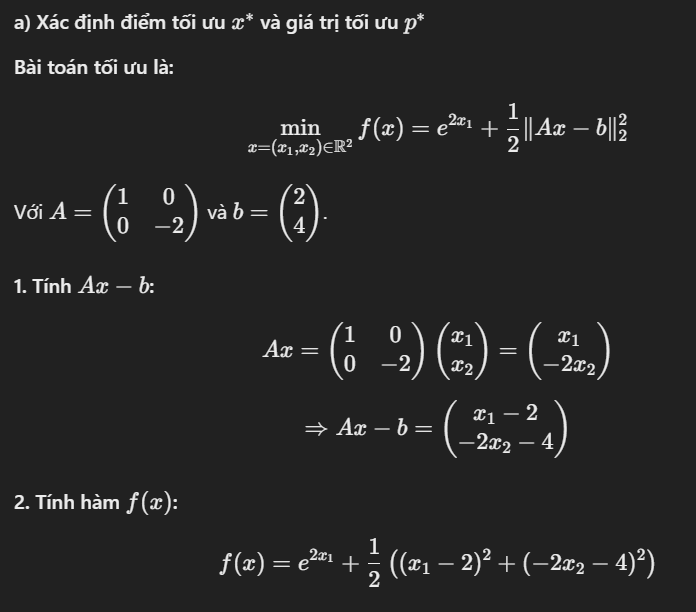

Cho ma trận $ A = \begin{pmatrix} 1 & 0 \\ 0 & -2 \end{pmatrix} $ và vector $ b = \begin{pmatrix} 2 \\ 4 \end{pmatrix} $. Xét bài toán tối ưu sau:

$min_{x = (x_1, x_2) \in \mathbb{R}^2} f(x) = e^{2x_1} + \frac{1}{2} \|Ax - b\|_2^2$

\subsection*{a) Xác định điểm tối ưu $x^*$ và giá trị tối ưu $p^*$}

Để tìm điểm tối ưu, ta sử dụng phương pháp tối ưu hóa. Đầu tiên, tính toán:


Ax = \begin{pmatrix} x_1 \\ -2x_2 \end{pmatrix}


Từ đó, ta có:

$
Ax - b = \begin{pmatrix} x_1 - 2 \\ -2x_2 - 4 \end{pmatrix}
$

Hàm mục tiêu $ f(x) $ được tính như sau:

$
f(x) = e^{2x_1} + \frac{1}{2} \left((x_1 - 2)^2 + (-2x_2 - 4)^2\right)
$

Sử dụng thư viện tối ưu hóa để tìm nghiệm $ x^* $ và giá trị tối ưu $ p^* $.

\subsection*{b) Sử dụng thuật toán Gradient Descent}

Chúng ta sẽ áp dụng thuật toán Gradient Descent với các learning rate khác nhau.

\begin{itemize}
    \item Đầu tiên, xác định gradient của hàm mục tiêu:
    $
    \nabla f(x) = \begin{pmatrix} 2e^{2x_1} + (x_1 - 2) \\ -2(-2x_2 - 4) \end{pmatrix}
    $
    
    \item Khởi tạo giá trị ban đầu $ x^{(0)} = (-3, 5) $ và thực hiện tối đa 100 vòng lặp.
    \item Sử dụng hai learning rate: $ \alpha_1 = \frac{2}{5} $ và $ \alpha_2 = \frac{1}{2} $.
\end{itemize}

Trong mỗi vòng lặp, cập nhật giá trị $ x $ theo công thức:

$
x^{(k+1)} = x^{(k)} - \alpha \nabla f(x^{(k)})
$

In ra giá trị $ x^{(k)} $ và $ f(x^{(k)}) $ sau mỗi vòng lặp. Cuối cùng, vẽ đồ thị biểu thị sai số $ |f(x^{(k)}) - p^*| $ cho hai trường hợp của learning rate.

In [9]:
import numpy as np
from scipy.optimize import minimize

# Định nghĩa hàm f(x)
def f(x):
    A = np.array([[1, 0], [0, -2]])
    b = np.array([2, 4])
    return np.exp(2 * x[0]) + 0.5 * np.linalg.norm(A @ x - b)**2

# Tìm điểm tối ưu
initial_guess = np.array([-3, 5])
result = minimize(f, initial_guess)

# In kết quả
x_star = result.x
p_star = result.fun
print("Điểm tối ưu x^*:", x_star)
print("Giá trị tối ưu p^*:", p_star)

Điểm tối ưu x^*: [ 2.80428543e-07 -2.00000027e+00]
Giá trị tối ưu p^*: 3.0000000000003393


## b)

In [6]:
import matplotlib.pyplot as plt

# Định nghĩa hàm Gradient
def gradient(x):
    A = np.array([[1, 0], [0, -2]])
    b = np.array([2, 4])
    grad = np.zeros(2)
    grad[0] = 2 * np.exp(2 * x[0]) + (x[0] - 2)
    grad[1] = 4 * (-2 * x[1] - 4)
    return grad

# Hàm Gradient Descent
def gradient_descent(initial_x, learning_rate, max_iter):
    x = initial_x.copy()
    p_star_values = []  # Lưu giá trị f(x_k)
    errors = []  # Lưu sai số |f(x_k) - p^*|
    
    for k in range(max_iter):
        f_k = f(x)
        p_star_values.append(f_k)
        error = abs(f_k - p_star)
        errors.append(error)

        # Cập nhật x
        x = x - learning_rate * gradient(x)
        
        print(f"Vòng lặp {k+1}: x = {x}, f(x) = {f_k}, sai số = {error}")

    return x, p_star_values, errors

# Giá trị ban đầu và tham số
initial_x = np.array([-3, 5])
max_iter = 100

# Learning rate 1: 2/5
learning_rate1 = 2 / 5
final_x1, p_star_values1, errors1 = gradient_descent(initial_x, learning_rate1, max_iter)

# Learning rate 2: 1/2
learning_rate2 = 1 / 2
final_x2, p_star_values2, errors2 = gradient_descent(initial_x, learning_rate2, max_iter)

Vòng lặp 1: x = [-1.001983 27.4     ], f(x) = 110.50247875217669, sai số = 107.50247875217634
Vòng lặp 2: x = [9.09705142e-02 1.21480000e+02], f(x) = 1733.3607505773552, sai số = 1730.360750577355
Vòng lặp 3: x = [-1.05052454e-01  5.16616000e+02], f(x) = 30497.64254024162, sai số = 30494.64254024162
Vòng lặp 4: x = [8.85691564e-02 2.17618720e+03], f(x) = 537928.1370341309, sai số = 537925.1370341309
Vòng lặp 5: x = [-1.01895465e-01  9.14638624e+03], f(x) = 9489001.977067817, sai số = 9488998.977067817
Vòng lặp 6: x = [8.63564191e-02 3.84212222e+04], f(x) = 167385944.61705783, sai số = 167385941.61705783
Vòng lặp 7: x = [-9.90059543e-02  1.61375533e+05], f(x) = 2952688012.7102304, sai số = 2952688009.7102304
Vòng lặp 8: x = [8.43083604e-02 6.77783640e+05], f(x) = 52085416493.96704, sai số = 52085416490.96704
Vòng lặp 9: x = [-9.63480856e-02  2.84669769e+06], f(x) = 918786746903.2671, sai số = 918786746900.2671
Vòng lặp 10: x = [8.24051378e-02 1.19561367e+07], f(x) = 16207398215323.406, 

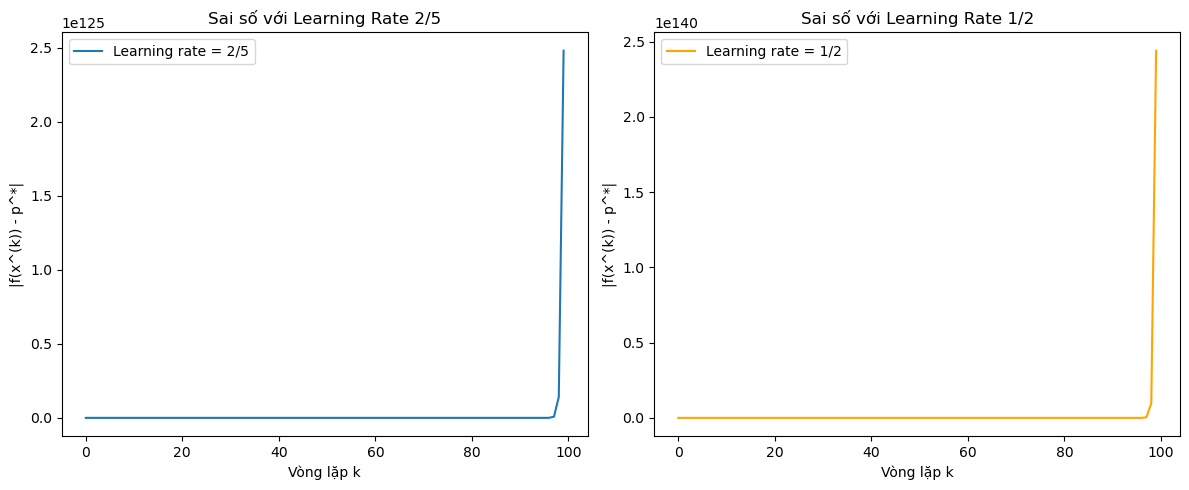

In [7]:
# Vẽ đồ thị cho sai số
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(errors1, label='Learning rate = 2/5')
plt.title('Sai số với Learning Rate 2/5')
plt.xlabel('Vòng lặp k')
plt.ylabel('|f(x^(k)) - p^*|')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(errors2, label='Learning rate = 1/2', color='orange')
plt.title('Sai số với Learning Rate 1/2')
plt.xlabel('Vòng lặp k')
plt.ylabel('|f(x^(k)) - p^*|')
plt.legend()

plt.tight_layout()
plt.show()

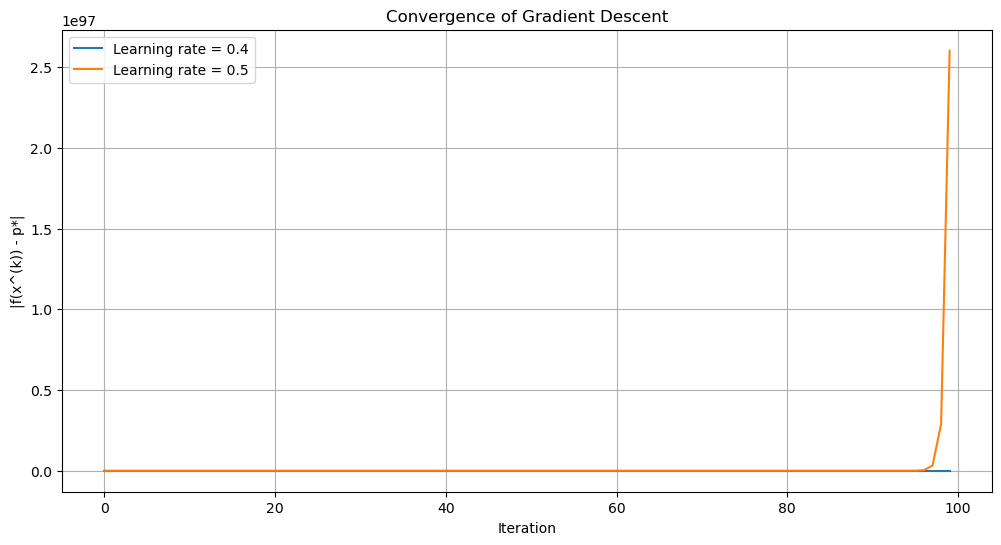


Learning rate: 0.4
Iteration 0: x = [ -1.001983 -17.4     ], f(x) = 478.9607505773551
Iteration 1: x = [ 0.09097051 31.88      ], f(x) = 2298.7305402416105
Iteration 2: x = [ -0.10505245 -76.536     ], f(x) = 11114.256714130557
Iteration 3: x = [8.85691564e-02 1.61979200e+02], f(x) = 53781.37664541401
Iteration 4: x = [-1.01895465e-01 -3.62754240e+02], f(x) = 260290.2679711063
Iteration 5: x = [8.63564191e-02 7.91659328e+02], f(x) = 1259793.2773834593
Iteration 6: x = [-9.90059543e-02 -1.74805052e+03], f(x) = 6097387.871232356
Iteration 7: x = [8.43083604e-02 3.83931115e+03], f(x) = 29511345.68272649
Iteration 8: x = [-9.63480856e-02 -8.45288452e+03], f(x) = 142834901.51642492
Iteration 9: x = [8.24051378e-02 1.85899460e+04], f(x) = 691320911.7304316
Iteration 10: x = [-9.38924215e-02 -4.09042811e+04], f(x) = 3345993201.1903434
Iteration 11: x = [8.06301402e-02 8.99830184e+04], f(x) = 16194607082.156675
Iteration 12: x = [-9.16145207e-02 -1.97969041e+05], f(x) = 78381898266.05612
Iter

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Định nghĩa hàm mục tiêu
def f(x):
    x1, x2 = x
    return np.exp(2 * x1) + 0.5 * ((x1 - 2) ** 2 + (2 * x2 + 4) ** 2)

# Định nghĩa gradient
def gradient(x):
    x1, x2 = x
    df_dx1 = 2 * np.exp(2 * x1) + (x1 - 2)
    df_dx2 = 4 * (2 * x2 + 4)
    return np.array([df_dx1, df_dx2])

# Gradient Descent
def gradient_descent(x0, alpha, max_iter):
    x = x0
    history = []
    for _ in range(max_iter):
        grad = gradient(x)
        x = x - alpha * grad
        history.append((x.copy(), f(x)))
    return history

# Thiết lập thông số
x0 = np.array([-3, 5])
max_iter = 100
alphas = [2/5, 1/2]

# Lưu trữ kết quả cho cả hai learning rate
results = {}
for alpha in alphas:
    history = gradient_descent(x0, alpha, max_iter)
    results[alpha] = history

# Tính giá trị tối ưu p*
# Giả sử điểm tối ưu đã được tìm
x_star = np.array([2, -2])  # Cần được tính từ câu a
p_star = f(x_star)

# Tính sai số |f(x^(k)) - p*|
errors = {alpha: [abs(f_val - p_star) for _, f_val in history] for alpha, history in results.items()}

# Vẽ đồ thị
plt.figure(figsize=(12, 6))
for alpha, error in errors.items():
    plt.plot(error, label=f'Learning rate = {alpha}')
plt.xlabel('Iteration')
plt.ylabel('|f(x^(k)) - p*|')
plt.title('Convergence of Gradient Descent')
plt.legend()
plt.grid()
plt.show()

# In ra giá trị x^(k) và f(x^(k))
for alpha, history in results.items():
    print(f"\nLearning rate: {alpha}")
    for k, (x_k, f_x_k) in enumerate(history):
        print(f"Iteration {k}: x = {x_k}, f(x) = {f_x_k}")

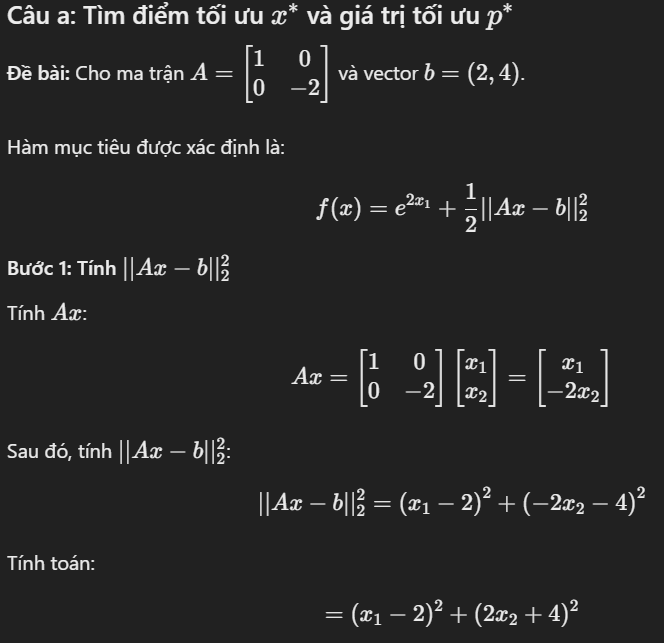
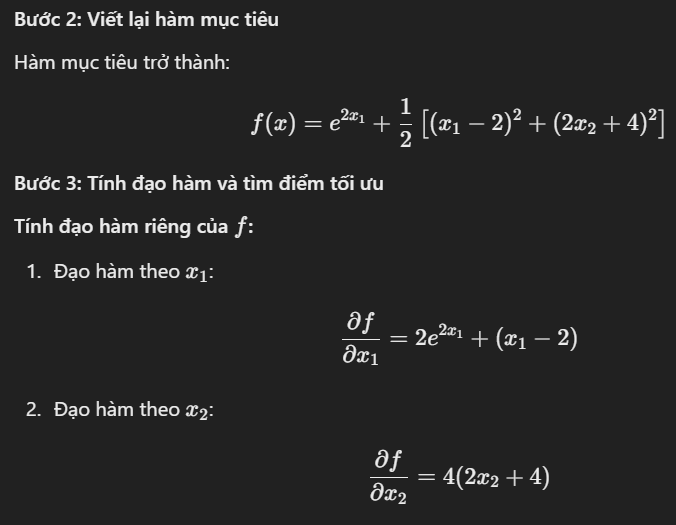
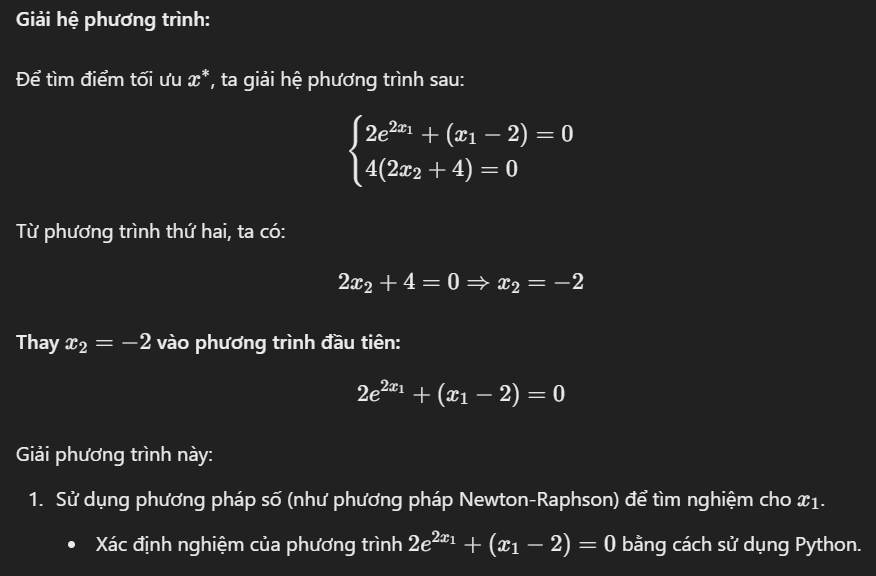

# Câu 3. cho các vector $c, a_1, a_2, ...., a_m\in \mathbb{R}^n$ và các số $b_1, b_2, ...., b_m\in \mathbb{R} (m \in Z^+) $

\begin{align} 
\min_{x\in \mathbb{R}^n} f(x) = c^Tx- \sum_{i=1}^{m}log(b_i - a_i^Tx)  (2)
\end{align}


câu a tính $\nabla f, \nabla^2f$ và chứng minh rằng f là hàm lồi trên tập xác định của nó

câu b. cho m = 4, n = 3 và ma trận $A \in M_{3x4}(\mathbb{R})$ được xác định như sau:

 $A = \begin{bmatrix} 0 & -2 & -1 & -2 \\ -1 & 1 & -3 & 0 \\ 1 & -1 & 2 & -5 \end{bmatrix}$
 
 
 gọi $a_i$ là cột thứ i của $A (i = 1, 2, 3, 4), b = (3, -1, 3, 2) và c = (4, 11/4, 13/4)$
 
 Xác định điểm tối ưu $x^*$ và giá trị tối ưu $p^*$ của bài toán (2)
 
 c. với dữ kiện được gới ý từ câu b) sử dụng thuật toán Gradient descent cho bài toán (2) với learning rate đc tính theo pp exact line search và điểm khởi tạo $x^{(0)} = (-1, 1, 0)$ , vẽ đồ thị biểu thị cho sai số $err_k = |f(x^{(k)}) - p^*|$. Từ đó anh chị rút ra đc kết luận gì?

Để giải câu a của bài toán, chúng ta sẽ thực hiện các bước sau:

1. Tính đạo hàm bậc nhất của hàm mục tiêu \( f(x) \).
2. Tính đạo hàm bậc hai của hàm mục tiêu \( f(x) \).
3. Chứng minh rằng \( f \) là hàm lồi trên tập xác định của nó.

### Câu a: Tính toán $(\nabla f) và (\nabla^2 f)$

#### 1. Hàm mục tiêu

Hàm mục tiêu được cho bởi:

$
f(x) = c^T x - \sum_{i=1}^{m} \log(b_i - a_i^T x)
$

Trong đó:
- $( c \in \mathbb{R}^n )$
- $( a_i \in \mathbb{R}^n )$
- $( b_i \in \mathbb{R} )$

#### 2. Tính đạo hàm bậc nhất $((\nabla f))$

Áp dụng quy tắc đạo hàm cho hàm logarit và tổng, ta có:


$\nabla f(x) = c - \sum_{i=1}^{m} \frac{a_i}{b_i - a_i^T x}$

Trong đó:
- $( \frac{a_i}{b_i - a_i^T x} ) là đạo hàm của hàm logarit theo ( x ).$

#### 3. Tính đạo hàm bậc hai $((\nabla^2 f))$

Để tính đạo hàm bậc hai, ta sử dụng quy tắc đạo hàm cho hàm phân số. Đạo hàm bậc hai sẽ là:


$\nabla^2 f(x) = \sum_{i=1}^{m} \frac{a_i a_i^T}{(b_i - a_i^T x)^2}$

Trong đó:
- $( a_i a_i^T ) là tích của vector ( a_i ) với chính nó (ma trận).$

#### 4. Chứng minh rằng \( f \) là hàm lồi

Để chứng minh rằng hàm \( f \) là hàm lồi, chúng ta cần chứng minh rằng \(\nabla^2 f(x)\) là ma trận dương định nghĩa.

**Ma trận dương định nghĩa**: $Một ma trận ( M ) được gọi là dương định nghĩa nếu cho mọi vector không bằng 0 ( z \in \mathbb{R}^n ), ta có:$

$
z^T M z > 0
$

Với hàm $( f )$, ta có:

$
\nabla^2 f(x) = \sum_{i=1}^{m} \frac{a_i a_i^T}{(b_i - a_i^T x)^2}
$

$Vì ( b_i - a_i^T x > 0 ) trong tập xác định của hàm (theo định nghĩa của hàm logarit), nên ( (b_i - a_i^T x)^2 > 0 ). Do đó, mỗi thành phần ( \frac{a_i a_i^T}{(b_i - a_i^T x)^2} ) sẽ là ma trận dương định nghĩa.$

**Chứng minh**:

Cho một vector không bằng 0 $( z )$:

$
z^T \nabla^2 f(x) z = z^T \left( \sum_{i=1}^{m} \frac{a_i a_i^T}{(b_i - a_i^T x)^2} \right) z = \sum_{i=1}^{m} \frac{(z^T a_i)^2}{(b_i - a_i^T x)^2} > 0
$

Vì $( (z^T a_i)^2 \geq 0 ) và ( (b_i - a_i^T x)^2 > 0 )$, suy ra:

$
z^T \nabla^2 f(x) z > 0
$

Vậy hàm $( f(x) )$ là hàm lồi.

### Kết luận

Trong câu a, chúng ta đã tính được đạo hàm bậc nhất và bậc hai của hàm mục tiêu $( f(x) )$, cũng như chứng minh được rằng hàm này là lồi trên tập xác định của nó. Nếu bạn cần thêm thông tin hoặc có câu hỏi cụ thể nào, hãy cho mình biết nhé!

In [ ]:
import numpy as np

# Định nghĩa epsilon để tránh chia cho 0
epsilon = 1e-8

# Định nghĩa hàm f(x)
def f(x, c, A, b):
    return np.dot(c, x) - np.sum(np.log(b - np.dot(A.T, x) + epsilon))

# Định nghĩa gradient của f(x)
def grad_f(x, c, A, b):
    return c - np.sum(A / (b - np.dot(A.T, x) + epsilon), axis=1)

# Định nghĩa Hessian của f(x)
def hess_f(x, A, b):
    H = np.zeros((len(x), len(x)))
    for i in range(A.shape[1]):
        ai = A[:, i].reshape(-1, 1)
        H += np.dot(ai, ai.T) / (b[i] - np.dot(ai.T, x) + epsilon)**2
    return H

# Gradient descent với exact line search
def gradient_descent(c, A, b, x0, tol=1e-6):
    x = x0
    err = []
    while True:
        grad = grad_f(x, c, A, b)
        Hess = hess_f(x, A, b)
        alpha = np.dot(grad.T, grad) / np.dot(np.dot(grad.T, Hess), grad)
        x_moi = x - alpha * grad
        err.append(np.abs(f(x_moi, c, A, b) - f(x0, c, A, b)))
        if np.linalg.norm(x_moi - x) < tol:
            break
        x = x_moi
    return x_moi, f(x_moi, c, A, b), err

# Dữ liệu đã cho
A = np.array([[0, -2, -1, -2], [-1, 1, -3, 0], [1, -1, 2, -5]])
b = np.array([3, -1, 3, 2])
c = np.array([4, 11/4, 13/4])
x0 = np.array([-1, 1, 0])

# Tìm điểm tối ưu và giá trị tối ưu
x_star, p_star, err = gradient_descent(c, A, b, x0)

print("Điểm tối ưu:", x_star)
print("Giá trị tối ưu:", p_star)

# Vẽ đồ thị sai số
import matplotlib.pyplot as plt

plt.plot(err)
plt.xlabel('Lần lặp')
plt.ylabel('Sai số')
plt.title('Sai số theo số lần lặp')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3708\876126248.py:16: RuntimeWarning: invalid value encountered in log
  sum_log += np.log(b[i] - np.dot(A[i], x))


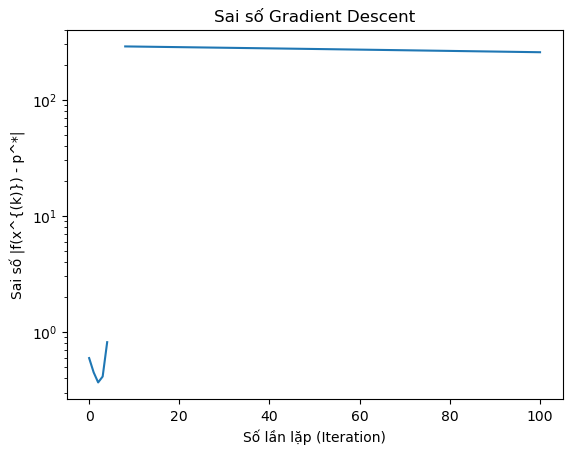

Điểm tối ưu x*:  [-63.3505007   56.5563505  113.30246968]
Giá trị tối ưu f(x*):  252.14465593882687


In [1]:
#Bai 3 
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Ma trận A và các vector b, c
A = np.array([[0, -2, -2], [1, -1, -2], [1, -1, -5]])
b = np.array([3, -1, 2])
c = np.array([4, 11/4, 13/4])

# Hàm mục tiêu
def f(x):
    m = len(b)
    sum_log = 0
    for i in range(m):
        sum_log += np.log(b[i] - np.dot(A[i], x))
    return np.dot(c, x) - sum_log

# Gradient của hàm mục tiêu
def grad_f(x):
    m = len(b)
    grad = c.copy()
    for i in range(m):
        grad -= A[i] / (b[i] - np.dot(A[i], x))
    return grad

# Thuật toán Gradient Descent
def gradient_descent(x0, learning_rate, max_iter=100):
    x = x0
    x_vals = [x0]
    f_vals = [f(x0)]
    for i in range(max_iter):
        grad = grad_f(x)
        x = x - learning_rate * grad
        x_vals.append(x)
        f_vals.append(f(x))
    return np.array(x_vals), np.array(f_vals)

# Khởi tạo
x0 = np.array([-1, 1, 0])  # Giá trị khởi tạo
learning_rate = 0.01  # Tốc độ học
max_iter = 100  # Số vòng lặp

# Thực hiện Gradient Descent
x_vals, f_vals = gradient_descent(x0, learning_rate, max_iter)

# Vẽ đồ thị sai số
plt.plot(np.abs(f_vals - min(f_vals)))
plt.xlabel('Số lần lặp (Iteration)')
plt.ylabel('Sai số |f(x^{(k)}) - p^*|')
plt.yscale('log')  # Thang đo logarit cho sai số
plt.title('Sai số Gradient Descent')
plt.show()

# In ra kết quả tối ưu
print("Điểm tối ưu x*: ", x_vals[-1])
print("Giá trị tối ưu f(x*): ", f_vals[-1])